In [1]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [2]:
df = pd.read_parquet('german_credit_data.parquet').drop('Unnamed: 0', axis=1)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,None,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,None,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,None,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,None,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
df = df.rename(columns = {
    'Sex': 'Gender',
    'Saving accounts': 'Saving_acc',
    'Checking account': 'Checking_acc',
    'Credit amount': 'Credit_mnt',
})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Job           1000 non-null   int64 
 3   Housing       1000 non-null   object
 4   Saving_acc    817 non-null    object
 5   Checking_acc  606 non-null    object
 6   Credit_mnt    1000 non-null   int64 
 7   Duration      1000 non-null   int64 
 8   Purpose       1000 non-null   object
 9   Risk          1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [5]:
df.describe()

,Age,Job,Credit_mnt,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [6]:
df.isna().sum()

Age               0
Gender            0
Job               0
Housing           0
Saving_acc      183
Checking_acc    394
Credit_mnt        0
Duration          0
Purpose           0
Risk              0
dtype: int64

# Feature Engineering

### Binary Features
- Gender
- Risk

converting to numerical values

In [7]:
df.Gender = df.Gender.apply(lambda x: 1 if x == 'male' else 0)
df.Risk = df.Risk.apply(lambda x: 1 if x == 'good' else 0)

### Continuous Features
- Age
- Duration
- Credit_mnt

bucketing continuous features

In [8]:
def categorize(df, feature, ):
    cutted = pd.qcut(df[feature], 3, ['low', 'medium', 'high'])
    categorized = pd.DataFrame(cutted)
    df[feature] = categorized
    return df

In [9]:
def one_hot_encode(df, feature):
    encoded = pd.get_dummies(df[feature], feature)
    df = df.drop(feature, axis=1)
    return df.join(encoded)

In [10]:
df = categorize(df, 'Age')
df = one_hot_encode(df, 'Age')

df = categorize(df, 'Duration')
df = one_hot_encode(df, 'Duration')

df = categorize(df, 'Credit_mnt')
df = one_hot_encode(df, 'Credit_mnt')

df

,Gender,Job,Housing,Saving_acc,Checking_acc,Purpose,Risk,Age_low,Age_medium,Age_high,Duration_low,Duration_medium,Duration_high,Credit_mnt_low,Credit_mnt_medium,Credit_mnt_high
0,1,2,own,None,little,radio/TV,1,0,0,1,1,0,0,1,0,0
1,0,2,own,little,moderate,radio/TV,0,1,0,0,0,0,1,0,0,1
2,1,1,own,little,None,education,1,0,0,1,1,0,0,0,1,0
3,1,2,free,little,little,furniture/equipment,1,0,0,1,0,0,1,0,0,1
4,1,2,free,little,little,car,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,own,little,None,furniture/equipment,1,0,1,0,1,0,0,0,1,0
996,1,3,own,little,little,car,1,0,0,1,0,0,1,0,0,1
997,1,2,own,little,None,radio/TV,1,0,1,0,1,0,0,1,0,0
998,1,2,free,little,little,radio/TV,0,1,0,0,0,0,1,0,1,0


### Categorical Features
- Job
- Housing
- Saving_acc
- Checking_acc
- Purpose

bucketing continuous features

#### Job
How many jobs person have

In [11]:
df.Job.value_counts(dropna=False)

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [12]:
df.Job = df.Job.astype(object)
df = one_hot_encode(df, 'Job')

df

/tmp/ipykernel_26558/3693660925.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  encoded = pd.get_dummies(df[feature], feature)


,Gender,Housing,Saving_acc,Checking_acc,Purpose,Risk,Age_low,Age_medium,Age_high,Duration_low,Duration_medium,Duration_high,Credit_mnt_low,Credit_mnt_medium,Credit_mnt_high,Job_0,Job_1,Job_2,Job_3
0,1,own,None,little,radio/TV,1,0,0,1,1,0,0,1,0,0,0,0,1,0
1,0,own,little,moderate,radio/TV,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,own,little,None,education,1,0,0,1,1,0,0,0,1,0,0,1,0,0
3,1,free,little,little,furniture/equipment,1,0,0,1,0,0,1,0,0,1,0,0,1,0
4,1,free,little,little,car,0,0,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,own,little,None,furniture/equipment,1,0,1,0,1,0,0,0,1,0,0,1,0,0
996,1,own,little,little,car,1,0,0,1,0,0,1,0,0,1,0,0,0,1
997,1,own,little,None,radio/TV,1,0,1,0,1,0,0,1,0,0,0,0,1,0
998,1,free,little,little,radio/TV,0,1,0,0,0,0,1,0,1,0,0,0,1,0


#### Housing
Persons housing type

In [13]:
df.Housing.value_counts(dropna=False)

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [14]:
df = one_hot_encode(df, 'Housing')

#### Saving account
Persons saving account amount

In [15]:
df.Saving_acc.value_counts(dropna=False)

little        603
None          183
moderate      103
quite rich     63
rich           48
Name: Saving_acc, dtype: int64

In [16]:
df.Saving_acc = df.Saving_acc.map({
    None: 'none',
    'little': 'low',
    'moderate': 'medium',
    'quite rich': 'high',
    'rich': 'high'
})

In [17]:
df = one_hot_encode(df, 'Saving_acc')

#### Checking account
Persons checking account amount

In [18]:
df.Checking_acc.value_counts(dropna=False)

None        394
little      274
moderate    269
rich         63
Name: Checking_acc, dtype: int64

In [19]:
df.Checking_acc = df.Checking_acc.map({
    None: 'none',
    'little': 'low',
    'moderate': 'medium',
    'rich': 'high'
})

In [20]:
df = one_hot_encode(df, 'Checking_acc')

#### Purpose
Persons credit application purpose

In [21]:
df.Purpose.value_counts(dropna=False)

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [22]:
df.Purpose = df.Purpose.str.replace('/', '_').str.replace(' ', '_')

In [23]:
df = one_hot_encode(df, 'Purpose')

In [24]:
df.corr().loc['Risk'].sort_values()

Checking_acc_low              -0.258333
Duration_high                 -0.171118
Saving_acc_low                -0.161007
Checking_acc_medium           -0.119581
Age_low                       -0.100864
Credit_mnt_high               -0.097698
Housing_rent                  -0.092785
Housing_free                  -0.081556
Purpose_education             -0.049085
Job_3                         -0.040559
Purpose_business              -0.036129
Purpose_vacation_others       -0.028058
Purpose_car                   -0.022621
Saving_acc_medium             -0.022255
Purpose_furniture_equipment   -0.020971
Purpose_repairs               -0.020828
Purpose_domestic_appliances   -0.008016
Job_0                         -0.005951
Duration_medium                0.005766
Job_2                          0.013559
Job_1                          0.021822
Credit_mnt_low                 0.024059
Checking_acc_high              0.044009
Age_medium                     0.044956
Age_high                       0.056136


In [25]:
df.cov().loc['Risk'].sort_values()
# df.cov()

Checking_acc_low              -0.052853
Saving_acc_low                -0.036136
Duration_high                 -0.033033
Checking_acc_medium           -0.024324
Age_low                       -0.021822
Credit_mnt_high               -0.021121
Housing_rent                  -0.016316
Housing_free                  -0.011612
Job_3                         -0.006607
Purpose_education             -0.005305
Purpose_car                   -0.004905
Purpose_business              -0.004905
Purpose_furniture_equipment   -0.003704
Saving_acc_medium             -0.003103
Purpose_vacation_others       -0.001401
Purpose_repairs               -0.001401
Purpose_domestic_appliances   -0.000400
Job_0                         -0.000400
Duration_medium                0.001301
Job_2                          0.003003
Job_1                          0.004004
Checking_acc_high              0.004905
Credit_mnt_low                 0.005205
Age_medium                     0.009810
Age_high                       0.012012


In [26]:
y = df.Risk
X = df.loc[:, df.columns != 'Risk']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
model = LogisticRegression()

model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

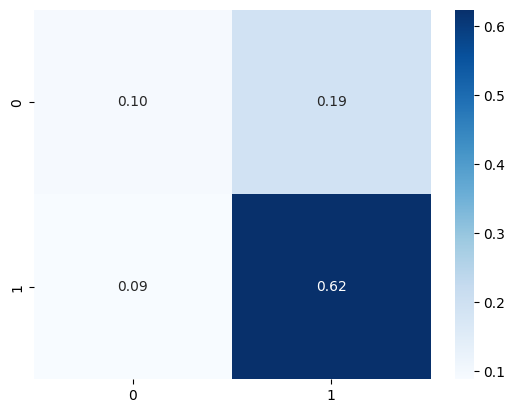

In [42]:
sns.heatmap(
    metrics.confusion_matrix(y_test, y_predicted, normalize='all'),
    cmap='Blues', annot=True, fmt='.2f'
)
plt.show()

In [31]:
print('Accuracy score:  {:.2f}'.format( metrics.accuracy_score(y_test, y_predicted) ))
print('F1 score:        {:.2f}'.format( metrics.f1_score(y_test, y_predicted) ))
print('Precision score: {:.2f}'.format( metrics.precision_score(y_test, y_predicted) ))
print('Recall score:    {:.2f}'.format( metrics.recall_score(y_test, y_predicted) ))

Accuracy score:  0.72
F1 score:        0.82
Precision score: 0.76
Recall score:    0.88
